# Selforganizing Map

Implementation based on Tensorflow.
Because we want a spatial division of our prices, we need the whole dataset. But we only use 3 Prices a day to thin out the amount of data

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
np.set_printoptions(precision=5, suppress=True)

from sqlalchemy import  create_engine

def create_connection():
    host = 'localhost'
    port = '3333'
    return create_engine(f"postgresql://infocup@{host}:{port}/infocup")

In [21]:
# Explanation for active stations in exploration_carlo.ipynb
con = create_connection()

active_stations = pd.read_sql_query("""select id, min_ts, max_ts
from stations
where min_ts <= '2015-01-01'
and max_ts >= '2017-09-18'""", con)

ids = np.random.choice(active_stations['id'], 100)

param = ','.join([str(x) for x in ids])
query = """select * from prices_sampled where station_id in (%s) 
and time_stamp between '2015-01-01' and '2017-09-18'""" % param
prices = pd.read_sql_query(query, con)
prices

,time_stamp,price,station_id
0,2015-01-01 00:00:00,1267,300
1,2015-01-01 01:00:00,1267,300
2,2015-01-01 02:00:00,1267,300
3,2015-01-01 03:00:00,1267,300
4,2015-01-01 04:00:00,1267,300
5,2015-01-01 05:00:00,1267,300
6,2015-01-01 06:00:00,1267,300
7,2015-01-01 07:00:00,1267,300
8,2015-01-01 08:00:00,1267,300
9,2015-01-01 09:00:00,1329,300


In [22]:
query = """
with differences as (
    select station_id,
        lead(time_stamp, 1, time_stamp) over (partition by station_id order by time_stamp asc) - time_stamp as difference,
        time_stamp
    from prices
    where time_stamp between '2015-01-01' and '2017-09-18'
)
select station_id,
    difference,
    time_stamp
from differences
where difference > '5 days'
order by difference desc
"""
top_list = pd.read_sql_query(query, con)
top_list

,station_id,difference,time_stamp
0,10218,773 days 00:13:30,2015-03-31 15:30:01
1,11500,624 days 06:00:30,2015-03-03 08:22:01
2,1299,508 days 21:51:05,2016-02-03 15:10:01
3,13959,484 days 12:37:30,2015-07-14 22:10:01
4,3216,430 days 09:49:00,2015-01-29 08:26:01
5,10564,422 days 18:16:04,2016-05-31 22:06:02
6,12921,422 days 18:16:04,2016-05-31 22:06:02
7,11230,422 days 18:16:04,2016-05-31 22:06:02
8,12137,422 days 18:16:04,2016-05-31 22:06:02
9,11476,422 days 07:44:04,2016-06-01 08:38:02


In [23]:
top_list2 = top_list.copy()
top_list2 = top_list2.drop('time_stamp', 1)
grouped = top_list2.groupby(['station_id']).sum()
grouped = grouped.sort_values('difference', ascending=False)
grouped.head(1000)

,difference
station_id,
14313,936 days 11:44:32
8139,933 days 13:17:00
12182,932 days 16:06:02
2227,931 days 12:50:26
14434,927 days 21:33:00
12022,924 days 11:35:37
14401,920 days 09:39:01
10316,918 days 10:09:01
10653,916 days 02:20:02


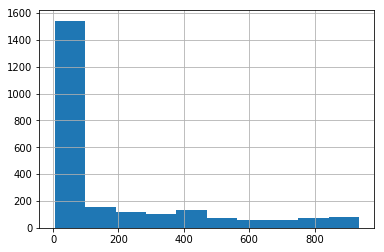

In [24]:
grouped.difference.astype('timedelta64[D]').hist()

In [25]:
not_ids = grouped[(grouped.difference > '50 days')].index.values
not_ids

array([14313,  8139, 12182, ...,  1655, 12869,  1660])

In [28]:
eligible_ids = np.setdiff1d(active_stations['id'], not_ids)
eligible_ids
ids = np.random.choice(eligible_ids, 100)
ids
param = ','.join([str(x) for x in ids])
query = """select * from prices_sampled where station_id in (%s) 
and time_stamp between '2015-01-01' and '2017-09-18'""" % param
prices = pd.read_sql_query(query, con)
prices

,time_stamp,price,station_id
0,2015-01-01 00:00:00,1389,95
1,2015-01-01 01:00:00,1389,95
2,2015-01-01 02:00:00,1389,95
3,2015-01-01 03:00:00,1389,95
4,2015-01-01 04:00:00,1389,95
5,2015-01-01 05:00:00,1389,95
6,2015-01-01 06:00:00,1269,95
7,2015-01-01 07:00:00,1269,95
8,2015-01-01 08:00:00,1269,95
9,2015-01-01 09:00:00,1269,95


SyntaxError: invalid syntax (<ipython-input-34-3fbcd3d988ea>, line 11)